In [3]:
import os 
imgs = 'datasets/finaltest_500/images'
print(len(os.listdir(imgs)))

500


In [5]:
import cv2
from tqdm.auto import tqdm
imgs_dir = "datasets/finaltest_500/images"
labels_dir = "datasets/finaltest_500/labels"
for i in tqdm(range(len(os.listdir(imgs_dir)))):
    image_path = os.path.join(imgs_dir, os.listdir(imgs_dir)[i])
    label_path = os.path.join(labels_dir, os.listdir(labels_dir)[i])
    # Load the image
    image = cv2.imread(image_path)
    image_height, image_width, _ = image.shape


    # Load YOLO labels (example format: [class_id, x_center, y_center, width, height])
    labels = []
    with open(label_path, 'r') as f: 
        for line in f.readlines()[:-1]: 
            line = line.replace('\n', '')
            labels.append(line.split())

    # Draw bounding boxes
    for label in labels:
        class_id, x_center, y_center, width, height = int(label[0]), float(label[1]), float(label[2]), float(label[3]), float(label[4])

        # Convert normalized coordinates to pixel values
        x_center = int(x_center * image_width)
        y_center = int(y_center * image_height)
        width = int(width * image_width)
        height = int(height * image_height)

        # Calculate top-left and bottom-right points
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)

        # Draw the rectangle
        color = (0, 255, 0)  # Green
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Add the label text
        label_text = f"({class_id})"
        cv2.putText(image, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # # Display the image with bounding boxes
    # cv2.imshow("YOLO Labels", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # Save the visualized image (optional)
    output_path = f'datasets/finaltest_500/images_test/{os.listdir(imgs_dir)[i]}'
    cv2.imwrite(output_path, image)


  0%|          | 0/500 [00:00<?, ?it/s]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [14]:
origin_img = Image.open("IMG_1581_iter_0.jpg")
origin_img = np.array(origin_img)

origin_img.shape

(3151, 2255, 3)

In [10]:
img = Image.open("page.jpg")

In [11]:
img_array = np.array(img)
img_rgb = img_array[:, :, :3]

In [12]:
img_rgb.shape

(1684, 1190, 3)

In [16]:
image = Image.fromarray(img_rgb)

# Resize the image
resized_image = img.resize((2255, 3151))

# Convert the resized image back to numpy array
resized_img_array = np.array(resized_image)

# Check the shape of the resized image
print(resized_img_array.shape)

(3151, 2255, 3)


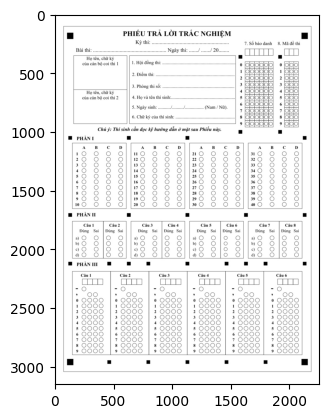

In [ ]:
plt.imshow(resized_img_array)

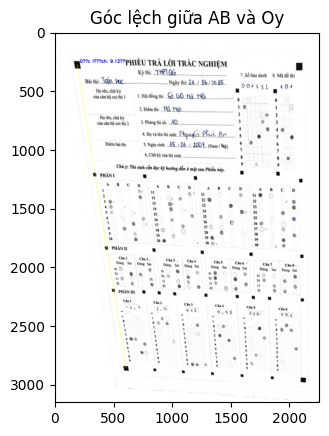

Góc lệch giữa AB và trục Oy: 9.12 độ
Góc xoay: 9.12 độ


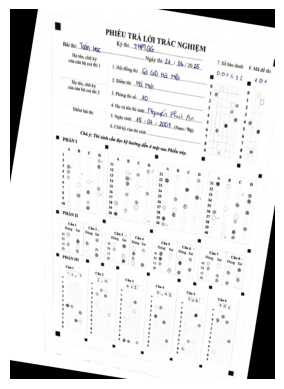

In [6]:
import cv2 
import numpy as np
from math import atan2, degrees, tan, radians, cos
import imutils
import matplotlib.pyplot as plt

def detect_corner(img_path: str): 
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 60, 200, cv2.THRESH_BINARY_INV)[1]

    # Tìm các contour lớn nhất
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:4]  # Lấy 4 contour lớn nhất

    centroids = []

    # Tính tâm của mỗi contour
    for i, c in enumerate(cnts):
        (x, y, w, h) = cv2.boundingRect(c)

        cX = int(x + w / 2)
        cY = int(y + h / 2)
        
        centroids.append((cX, cY, i))

    # Sắp xếp các tâm theo trục X (từ trái qua phải)
    centroids_sorted = sorted(centroids, key=lambda x: x[0])

    output = image.copy()

    # Lấy tọa độ hai điểm A và B
    x1, y1, _ = centroids_sorted[0]  # Tọa độ Top-left của Contour 1 (điểm A)
    x2, y2, _ = centroids_sorted[1]  # Tọa độ Top-left của Contour 2 (điểm B)

    # Vẽ đoạn thẳng AB
    cv2.line(output, (x1, y1), (x2, y2), (0, 255, 255), 2)

    # Tính vector AB
    AB_dx = x2 - x1
    AB_dy = y2 - y1

    # Tính góc giữa AB và Oy
    angle_AB_Oy = degrees(atan2(AB_dx, AB_dy))  # Góc giữa vector AB và Oy

    # Hiển thị góc trên ảnh
    text_angle = f"Góc lệch: {angle_AB_Oy:.2f}°"
    cv2.putText(output, text_angle, (x1 + 20, y1 - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 0, 0), 3, cv2.LINE_AA)

    # Vẽ hình ảnh kết quả
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title("Góc lệch giữa AB và Oy")
    plt.show()

    print(f"Góc lệch giữa AB và trục Oy: {angle_AB_Oy:.2f} độ")

    print(f"Góc xoay: {angle_AB_Oy:.2f} độ")
    return -angle_AB_Oy if angle_AB_Oy < 90 else 180 - angle_AB_Oy


# Detect the corner angle (assuming detect_corner is defined elsewhere)
corner = detect_corner("datasets/finaltest_500/images_reshaped/IMG_1.jpg")
from PIL import Image
# Open and rotate the image
image = Image.open("datasets/finaltest_500/images_reshaped/IMG_1.jpg")
image = image.rotate(corner)

# Display the image in the Jupyter Notebook
plt.imshow(image)
plt.axis("off")  # Turn off axes for better visualization
plt.show()

In [48]:
import numpy as np
from math import atan2, degrees, tan, radians, cos
coordinates = {
    'SBD1': ((400/3151, 1000/3151), (1500/2255, 1630/2255)),
    'SBD2': ((400/3151, 1000/3151), (1630/2255, 1670/2255)),
    'SBD3': ((400/3151, 1000/3151), (1670/2255, 1710/2255)),
    'SBD4': ((400/3151, 1000/3151), (1710/2255, 1750/2255)),
    'SBD5': ((400/3151, 1000/3151), (1750/2255, 1790/2255)),
    'SBD6': ((400/3151, 1000/3151), (1790/2255, 1830/2255)),
    'MDT1': ((400/3151, 1000/3151), (1860/2255, 1950/2255)),
    'MDT2': ((400/3151, 1000/3151), (1950/2255, 1990/2255)),
    'MDT3': ((400/3151, 1000/3151), (1990/2255, 2030/2555)),

    '1.1': ((1170/3151, 1220/3151), (170/2255, 650/2255)),
    '1.2': ((1220/3151, 1270/3151), (170/2255, 650/2255)),
    '1.3': ((1270/3151, 1320/3151), (170/2255, 650/2255)),
    '1.4': ((1320/3151, 1370/3151), (170/2255, 650/2255)),
    '1.5': ((1370/3151, 1420/3151), (170/2255, 650/2255)),
    '1.6': ((1420/3151, 1470/3151), (170/2255, 650/2255)),
    '1.7': ((1470/3151, 1520/3151), (170/2255, 650/2255)),
    '1.8': ((1520/3151, 1570/3151), (170/2255, 650/2255)),
    '1.9': ((1570/3151, 1620/3151), (170/2255, 650/2255)),
    '1.10': ((1620/3151, 1670/3151), (170/2255, 650/2255)),

    '1.11': ((1170/3151, 1220/3151), (670/2255, 1080/2255)),
    '1.12': ((1220/3151, 1270/3151), (670/2255, 1080/2255)),
    '1.13': ((1270/3151, 1320/3151), (670/2255, 1080/2255)),
    '1.14': ((1320/3151, 1370/3151), (670/2255, 1080/2255)),
    '1.15': ((1370/3151, 1420/3151), (670/2255, 1080/2255)),
    '1.16': ((1420/3151, 1470/3151), (670/2255, 1080/2255)),
    '1.17': ((1470/3151, 1520/3151), (670/2255, 1080/2255)),
    '1.18': ((1520/3151, 1570/3151), (670/2255, 1080/2255)),
    '1.19': ((1570/3151, 1620/3151), (670/2255, 1080/2255)),
    '1.20': ((1620/3151, 1670/3151), (670/2255, 1080/2255)),

    '1.21': ((1170/3151, 1220/3151), (1000/2255, 1580/2255)),
    '1.22': ((1220/3151, 1270/3151), (1000/2255, 1580/2255)),
    '1.23': ((1270/3151, 1320/3151), (1000/2255, 1580/2255)),
    '1.24': ((1320/3151, 1370/3151), (1000/2255, 1580/2255)),
    '1.25': ((1370/3151, 1420/3151), (1000/2255, 1580/2255)),
    '1.26': ((1420/3151, 1470/3151), (1000/2255, 1580/2255)),
    '1.27': ((1470/3151, 1520/3151), (1000/2255, 1580/2255)),
    '1.28': ((1520/3151, 1570/3151), (1000/2255, 1580/2255)),
    '1.29': ((1570/3151, 1620/3151), (1000/2255, 1580/2255)),
    '1.30': ((1620/3151, 1670/3151), (1000/2255, 1580/2255)),
    '1.31': ((1170/3151, 1220/3151), (1580/2255,2050/2255)),
    '1.32': ((1220/3151, 1270/3151), (1580/2255,2050/2255)),
    '1.33': ((1270/3151, 1320/3151), (1580/2255,2050/2255)),
    '1.34': ((1320/3151, 1370/3151), (1580/2255,2050/2255)),
    '1.35': ((1370/3151, 1420/3151), (1580/2255,2050/2255)),
    '1.36': ((1420/3151, 1470/3151), (1580/2255,2050/2255)),
    '1.37': ((1470/3151, 1520/3151), (1580/2255,2050/2255)),
    '1.38': ((1520/3151, 1570/3151), (1580/2255,2050/2255)),
    '1.39': ((1570/3151, 1620/3151), (1580/2255,2050/2255)),
    '1.40': ((1620/3151, 1670/3151), (1580/2255,2050/2255)),

    '2.1': ((1750/3151, 2100/3151), (160/2255, 400/2255)),
    '2.2': ((1750/3151, 2100/3151), (400/2255, 630/2255)),
    '2.3': ((1750/3151, 2100/3151), (630/2255, 880/2255)),
    '2.4': ((1750/3151, 2100/3151), (880/2255, 1130/2255)),
    '2.5': ((1750/3151, 2100/3151), (1130/2255, 1380/2255)),
    '2.6': ((1750/3151, 2100/3151), (1380/2255, 1610/2255)),
    '2.7': ((1750/3151, 2100/3151), (1610/2255, 1830/2255)),
    '2.8': ((1750/3151, 2100/3151), (1830/2255, 2050/2255)),

    '3.1': ((2050/3151, 2900/3151), (100/2255, 490/2255)),    
    '3.2': ((2050/3151, 2900/3151), (490/2255, 800/2255)),
    '3.3': ((2050/3151, 2900/3151), (800/2255, 1110/2255)),
    '3.4': ((2050/3151, 2900/3151), (1110/2255, 1420/2255)),
    '3.5': ((2050/3151, 2900/3151), (1420/2255, 1730/2255)),
    '3.6': ((2050/3151, 2900/3151), (1730/2255, 2040/2255)),
}
def rotate_boundary(coordinates, angle_radians, img_height, img_width):
    """
    Rotate bounding boxes based on an angle.
    
    Args:
        coordinates (dict): Dictionary of normalized bounding box coordinates.
                            Format: {key: ((h_min, h_max), (w_min, w_max))}
        angle_radians (float): Rotation angle in radians (from detect_corner()).
        img_height (int): Height of the image.
        img_width (int): Width of the image.
    
    Returns:
        dict: Rotated bounding boxes in the same format as input.
    """
    cos_theta = np.cos(angle_radians)
    sin_theta = np.sin(angle_radians)
    center_x = img_width / 2
    center_y = img_height / 2
    # center_x = 0
    # center_y = 0

    rotated_coordinates = {}

    for key, ((h_min, h_max), (w_min, w_max)) in coordinates.items():
        # Convert normalized to absolute coordinates
        h_min_abs = h_min * img_height
        h_max_abs = h_max * img_height
        w_min_abs = w_min * img_width
        w_max_abs = w_max * img_width

        # Define the four corners of the bounding box
        corners = [
            (w_min_abs, h_min_abs),  # Top-left
            (w_min_abs, h_max_abs),  # Bottom-left
            (w_max_abs, h_min_abs),  # Top-right
            (w_max_abs, h_max_abs),  # Bottom-right
        ]

        # Rotate each corner
        rotated_corners = []
        for x, y in corners:
            # Translate point to the origin (center of the image)
            x_shifted = x - center_x
            y_shifted = y - center_y

            # Apply rotation matrix
            x_rot = cos_theta * x_shifted - sin_theta * y_shifted
            y_rot = sin_theta * x_shifted + cos_theta * y_shifted

            # Translate back to the original coordinate system
            x_rot += center_x
            y_rot += center_y

            rotated_corners.append((x_rot, y_rot))

        # Get new bounding box from rotated corners
        x_coords = [corner[0] for corner in rotated_corners]
        y_coords = [corner[1] for corner in rotated_corners]

        new_w_min = min(x_coords) / img_width
        new_w_max = max(x_coords) / img_width
        new_h_min = min(y_coords) / img_height
        new_h_max = max(y_coords) / img_height

        # Save the rotated bounding box in normalized form
        rotated_coordinates[key] = ((new_h_min, new_h_max), (new_w_min, new_w_max))

    return rotated_coordinates


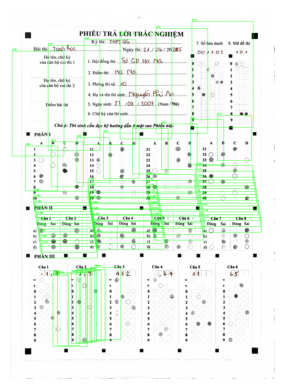

True

In [51]:
from PIL import Image
import numpy as np
import cv2
img = Image.open("datasets/testset2/images/IMG_70.jpg")
img = np.array(img)
labels = "datasets/testset2/labels/IMG_70.txt"

with open(labels, 'r') as f:   
    lines = f.readlines() 
    angle_diff = float(lines[-1].split()[-1])
coordinates = rotate_boundary(coordinates, angle_diff, img.shape[0], img.shape[1])

import matplotlib.pyplot as plt

# Draw bounding boxes with new coordinates
for key, ((h_min, h_max), (w_min, w_max)) in coordinates.items():
    # Convert normalized coordinates to pixel values
    x1 = int(w_min * img.shape[1])
    y1 = int(h_min * img.shape[0])
    x2 = int(w_max * img.shape[1])
    y2 = int(h_max * img.shape[0])

    # Draw the rectangle
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

    # Add the label text
    label_text = f"({key})"
    cv2.putText(img, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the image with bounding boxes
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

cv2.imwrite("output.jpg", img)

AB song song với CD và AD song song với BC: False
H1 - Tọa độ 4 góc: [(157, 475), (212, 475), (212, 527), (157, 527)]
H2 - Tọa độ 4 góc: [(486, 3129), (540, 3129), (540, 3180), (486, 3180)]
H3 - Tọa độ 4 góc: [(2115, 233), (2166, 233), (2166, 284), (2115, 284)]
H4 - Tọa độ 4 góc: [(2431, 2873), (2483, 2873), (2483, 2922), (2431, 2922)]


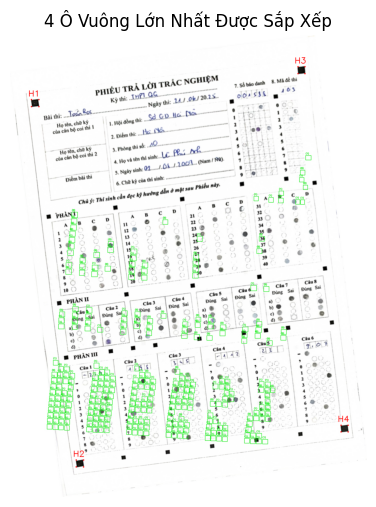

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
image = cv2.imread('datasets/finaltest_500/images_test/IMG_440.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Ngưỡng nhị phân để tách vùng đen
_, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)

# Loại bỏ nhiễu bằng cách sử dụng bộ lọc Median
thresh = cv2.medianBlur(thresh, 5)

# Phát hiện các đường viền (contours)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Lưu contour của 4 ô vuông lớn nhất
contour_areas = [(cv2.contourArea(c), c) for c in contours]
contour_areas = sorted(contour_areas, key=lambda x: x[0], reverse=True)  # Sắp xếp giảm dần theo diện tích

# Lấy 4 ô vuông lớn nhất
largest_4 = contour_areas[:4]
Goc = [c[1] for c in largest_4]

# Tính tọa độ trung tâm của mỗi ô vuông và sắp xếp theo giá trị X của tâm
square_centers = []

# Tính tâm các ô vuông và lưu vào danh sách
for c in Goc:
    x, y, w, h = cv2.boundingRect(c)
    center = (x + w // 2, y + h // 2)  # Tọa độ tâm
    square_centers.append((center, c))

# Sắp xếp các ô vuông theo X của tâm
square_centers = sorted(square_centers, key=lambda x: x[0][0])

# Lấy các tọa độ tâm của H1, H2, H3, H4
A, B, C, D = [center for center, _ in square_centers]

# Hàm kiểm tra xem hai đoạn thẳng có song song không
def are_parallel(p1, p2, p3, p4):
    # Tính hệ số góc của hai đoạn thẳng
    # Hệ số góc của đoạn thẳng (p1, p2) và (p3, p4) là: (y2 - y1) / (x2 - x1)
    # Để tránh chia cho 0, kiểm tra nếu x2 == x1 hoặc x4 == x3
    if p2[0] - p1[0] == 0 or p4[0] - p3[0] == 0:
        return p2[0] - p1[0] == p4[0] - p3[0]  # Nếu cả hai đoạn thẳng đứng, so sánh xem chúng có thẳng đứng không
    slope1 = (p2[1] - p1[1]) / (p2[0] - p1[0])
    slope2 = (p4[1] - p3[1]) / (p4[0] - p3[0])
    return np.isclose(slope1, slope2)

# Kiểm tra xem AB có song song với CD và AD có song song với BC không
AB_CD_parallel = are_parallel(A, B, C, D)
AD_BC_parallel = are_parallel(A, D, B, C)

# In kết quả
if AB_CD_parallel and AD_BC_parallel:
    print("AB song song với CD và AD song song với BC: True")
else:
    print("AB song song với CD và AD song song với BC: False")

# Đặt tên cho các ô vuông và in tọa độ 4 góc
output_image = image.copy()

for idx, (center, contour) in enumerate(square_centers):
    # Tính toán các điểm 4 góc của mỗi ô vuông
    x, y, w, h = cv2.boundingRect(contour)
    corners = [(x, y), (x + w, y), (x + w, y + h), (x, y + h)]

    
    # Đặt tên H1, H2, H3, H4 theo thứ tự X của tâm
    name = f'H{idx + 1}'
    
    # Vẽ các góc và tên lên ảnh bằng màu đỏ
    for corner in corners:
        cv2.circle(output_image, corner, 5, (0, 0, 255), -1)  # Vẽ các điểm góc (màu đỏ)
    
    # Vẽ tên cho mỗi ô vuông (màu đỏ) với cỡ chữ to hơn
    font_scale = 2  # Cỡ chữ lớn hơn
    cv2.putText(output_image, name, (center[0] - 50, center[1] - 50), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), 3)

    # In tọa độ 4 góc của ô vuông
    print(f'{name} - Tọa độ 4 góc: {corners}')

# Chuyển đổi sang định dạng RGB để hiển thị bằng Matplotlib
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Hiển thị kết quả bằng Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(output_image_rgb)
plt.title('4 Ô Vuông Lớn Nhất Được Sắp Xếp')
plt.axis('off')
plt.show()

# # Lưu ảnh kết quả
# cv2.imwrite('sorted_squares_red_large_font.jpg', output_image)

In [14]:
print(A)

(184, 501)


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

imgs_dir = "datasets/finaltest_500/images_reshaped"
out_dir = "datasets/finaltest_500/images_test"
for i in range(len(os.listdir(imgs_dir))):
    # Đọc ảnh
    image = cv2.imread(os.path.join(imgs_dir, os.listdir(imgs_dir)[i]))

    # Kiểm tra xem ảnh có được đọc đúng không
    if image is None:
        raise FileNotFoundError("Không thể đọc file ảnh. Vui lòng kiểm tra đường dẫn hoặc file.")

    # Kích thước ảnh
    height, width = 3551, 2255

    # Xác định các góc ảnh
    corners = {
        "top_left": (0, 0),
        "top_right": (width - 1, 0),
        "bottom_left": (0, height - 1),
        "bottom_right": (width - 1, height - 1),
    }

    # Chuyển sang ảnh grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Ngưỡng nhị phân để tách vùng đen
    _, thresh = cv2.threshold(gray, 70, 200, cv2.THRESH_BINARY_INV)

    # Loại bỏ nhiễu
    thresh = cv2.medianBlur(thresh, 5)

    # Phát hiện contour
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Lấy 27 contour lớn nhất
    contour_areas = sorted(contours, key=cv2.contourArea, reverse=True)[:27]

    # Tìm tọa độ trung tâm của mỗi contour
    square_centers = []
    for contour in contour_areas:
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            square_centers.append((cx, cy))

    # Tìm 4 ô vuông gần nhất với các góc ảnh
    corner_distances = {key: [] for key in corners}
    for center in square_centers:
        for corner_name, corner_coord in corners.items():
            distance = np.linalg.norm(np.array(center) - np.array(corner_coord))
            corner_distances[corner_name].append((distance, center))

    # Lấy 1 điểm gần nhất với mỗi góc
    selected_points = []
    for corner_name in corners:
        if len(corner_distances[corner_name]) > 0:
            nearest_point = min(corner_distances[corner_name], key=lambda x: x[0])[1]
            selected_points.append(nearest_point)

    # Sắp xếp các điểm theo thứ tự H1, H2, H3, H4 (trái trên, phải trên, phải dưới, trái dưới)
    sorted_points = sorted(selected_points, key=lambda x: (x[1], x[0]))  # Theo Y trước, X sau
    top_points = sorted(sorted_points[:2], key=lambda x: x[0])  # Trên: trái -> phải
    bottom_points = sorted(sorted_points[2:], key=lambda x: x[0])  # Dưới: trái -> phải

    H1, H2 = top_points[0], top_points[1]
    H3, H4 = bottom_points[1], bottom_points[0]

    # Tạo mảng các điểm gốc
    pts1 = np.array([H1, H2, H3, H4], dtype="float32")

    # Đặt kích thước cho ảnh warp
    output_width, output_height = 2255, 3551
    pts2 = np.array([[0, 0], [output_width - 1, 0], [output_width - 1, output_height - 1], [0, output_height - 1]], dtype="float32")

    # Tính toán ma trận biến đổi
    matrix = cv2.getPerspectiveTransform(pts1, pts2)

    # Áp dụng phép biến đổi perspective
    warped_image = cv2.warpPerspective(image, matrix, (output_width, output_height))

    # # Hiển thị ảnh gốc với các điểm góc
    # for idx, point in enumerate(pts1):
    #     cv2.circle(image, tuple(point.astype(int)), 10, (0, 0, 255), -1)
    #     cv2.putText(image, f"H{idx+1}", tuple(point.astype(int) + np.array([10, 10])),
    #                 cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # plt.figure(figsize=(10, 6))
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # plt.title("Ảnh Gốc với Các Điểm Góc (H1-H4)")
    # plt.axis("off")
    # plt.show()

    # # Hiển thị ảnh warp
    # plt.figure(figsize=(10, 6))
    # plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))
    # plt.title("Ảnh Sau Khi Warp")
    # plt.axis("off")
    # plt.show()
        

    # Lưu ảnh sau khi sửa phối cảnh
    output_path = os.path.join(out_dir, os.listdir(imgs_dir)[i])  # Đường dẫn tệp đầu ra
    cv2.imwrite(output_path, warped_image)  # Lưu ảnh
